In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
result = ctrl.Consequent(np.arange(0, 101, 1), 'result', defuzzify_method='centroid')
temperature['normal'] = fuzz.trapmf(temperature.universe, [0, 0, 20, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [20, 40, 60])
temperature['veryhot'] = fuzz.trapmf(temperature.universe, [40, 60, 100, 100])
humidity['dry'] = fuzz.trapmf(humidity.universe, [0, 0, 20, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [20, 40, 60])
humidity['wet'] = fuzz.trapmf(humidity.universe, [40, 60, 100, 100])
result['low'] = fuzz.trapmf(result.universe, [0, 0, 20, 40])
result['medium'] = fuzz.trimf(result.universe, [20, 40, 60])
result['high'] = fuzz.trapmf(result.universe, [40, 60, 100, 100])

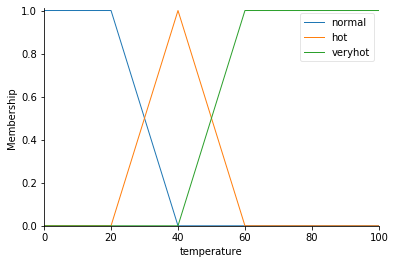

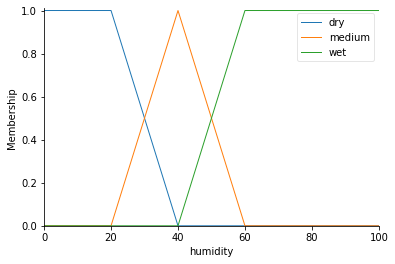

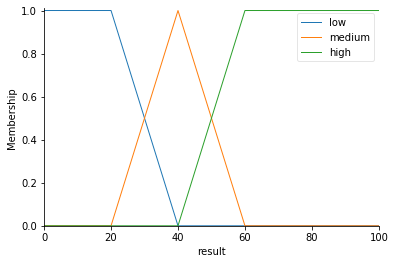

In [32]:
temperature.view()
humidity.view()
result.view()

In [4]:
rule1 = ctrl.Rule(temperature['normal'] & humidity['dry'], result['medium'])
rule2 = ctrl.Rule(temperature['normal'] & humidity['medium'], result['medium'])
rule3 = ctrl.Rule(temperature['normal'] & humidity['wet'], result['low'])
rule4 = ctrl.Rule(temperature['hot'] & humidity['dry'], result['high'])
rule5 = ctrl.Rule(temperature['hot'] & humidity['medium'], result['medium'])
rule6 = ctrl.Rule(temperature['hot'] & humidity['wet'], result['low'])
rule7 = ctrl.Rule(temperature['veryhot'] & humidity['dry'], result['high'])
rule8 = ctrl.Rule(temperature['veryhot'] & humidity['medium'], result['high'])
rule9 = ctrl.Rule(temperature['veryhot'] & humidity['wet'], result['high'])

In [ ]:
rule1.view()

In [7]:
resulting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,rule9])
resulting = ctrl.ControlSystemSimulation(resulting_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
resulting.input['temperature'] = 38
resulting.input['humidity'] = 22
# Crunch the numbers
resulting.compute()


72.43006263048024


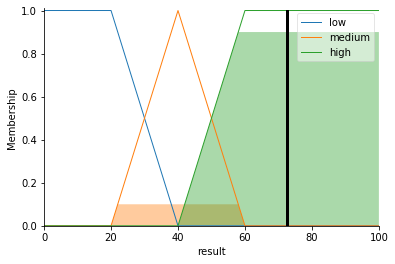

In [8]:
print(resulting.output['result'])
result.view(sim=resulting)